# <font color=green> **AULA PRÁTICA 4**
-----

## Objetivo:
Mostrar exemplos de estudos de Regressão e Aprendizado Não Supervisionado


## Tópicos:
1.   Aprendizado Supervisionado - Regressão
2.   Aprendizado Não Supervisionado - Agrupamento

# <font color=green> **1 - Aprendizado Supervisionado - Regressão**


* Descrição:

  - Nesta aula, iremos seguir o exemplo do site: https://aegis4048.github.io/mutiple_linear_regression_and_visualization_in_python. 
  - Este site é bem interessante. Sugiro darem uma olhada.

<br>

* Dataset utilizado no site está disponível no GitHub: https://github.com/GeostatsGuy/GeoDataSets.
  - Este repositório no GitHub é bem interessante, com diferentes exemplos sintéticos de dados para modelagem estatística de geociências.
  - O objetivo do repositório é apoiar exercícios estatísticos e geoestatísticos.

Dataset:

Este conjunto de dados tem variáveis de 200 poços, incluindo:

 - Well: Index do poço analisado 
 - Por: porosidade média do poço
 - Perm: transformação logarítmica de permeabilidade (para linearizar as relações com outras variáveis)
 - AI: impedância acústica  ($kg / m ^ 3$ x $m/s$ x $10 ^ 6$)
 - Brittle: taxa de constraste (%)
 - TOC: carbono orgânico total (%)
 - VR: refletância de vitrinita (%)
 - Prod: produção inicial média de 90 dias (MCFPD).

<br>

 O objetivo do problema é prever a produção inicial média de acordo com as outras variáveis disponíveis.

-------
## Parte 1 - Leitura do dataset e Importando Pacotes

In [ ]:
# Importando pacotes
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Leitura dos dados - Podemos e vamos usar o link fornecido direto pelo github. Caso vocês queiram ler por fora, forneci também o dataset em formato .csv
file = 'https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/unconv_MV_v5.csv'
df = pd.read_csv(file)

In [ ]:
# cabeçalho para entender o dataframe
df.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


In [ ]:
# dimensão
df.shape

(200, 8)

-------
## Parte 2 - Pré-processamento

In [ ]:
# vendo quantidade de elementos diferentes no wellIndex para ver se tem informações importantes
df['Well'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

Well é apenas o índice, e não irá trazer informações importantes. Iremos remover a variável

In [ ]:
df.drop(['Well'],1, inplace = True)

In [ ]:
df.head(5)

,Por,Perm,AI,Brittle,TOC,VR,Prod
0,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


In [ ]:
# Checando dados ausentes
df.info()       # notar que não temos valores ausentes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Por      200 non-null    float64
 1   Perm     200 non-null    float64
 2   AI       200 non-null    float64
 3   Brittle  200 non-null    float64
 4   TOC      200 non-null    float64
 5   VR       200 non-null    float64
 6   Prod     200 non-null    float64
dtypes: float64(7)
memory usage: 11.1 KB


In [ ]:
df.columns

Index(['Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR', 'Prod'], dtype='object')

Iremos fazer alguns gráficos a seguir.


- Reforço a importância de se fazer gráficos e estudos de análise exploratória dos dados para entendermos os padrões dos dados.


- Outro ponto: O objetivo não é sair fazendo gráfico apenas por fazer ou por ser bonito. A ideia é, o que você quer mostrar ou entender nos gráficos feitos?

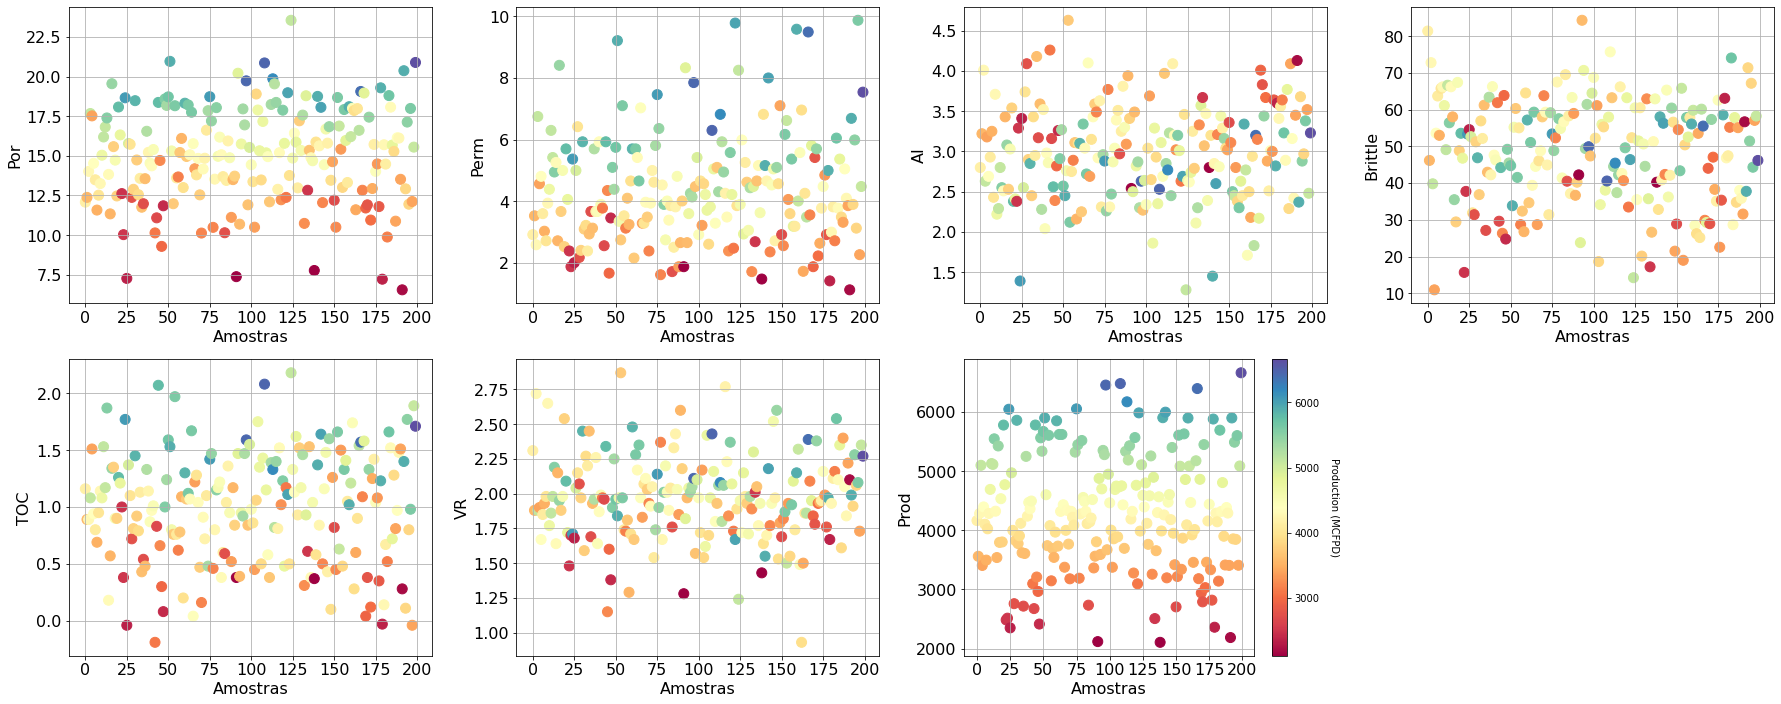

In [ ]:
# Gráficos de dispersão de cada uma das variáveis para verificar seu comportamento - a cor diferente é referente a produção de gás
fig = plt.figure(figsize=(25,10))
for i in range(1,len(df.columns)+1):
  ax = fig.add_subplot(2,4,i)
  im = ax.scatter(range(len(df)),df[[df.columns[i-1]]],s=100, alpha=1,c=df[df.columns[6]],cmap='Spectral')     # gráfico de dispersão
  plt.xlabel('Amostras',fontsize=16,color = 'black')
  plt.ylabel(df.columns[i-1],fontsize=16,color = 'black')
  plt.xticks(fontsize=16,color = 'black')
  plt.yticks(fontsize=16,color = 'black')
  plt.grid(b='on')
cbar = plt.colorbar(im, orientation = 'vertical')
cbar.set_label("Production (MCFPD)", rotation=270, labelpad=20)
fig.tight_layout(pad=1.5)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


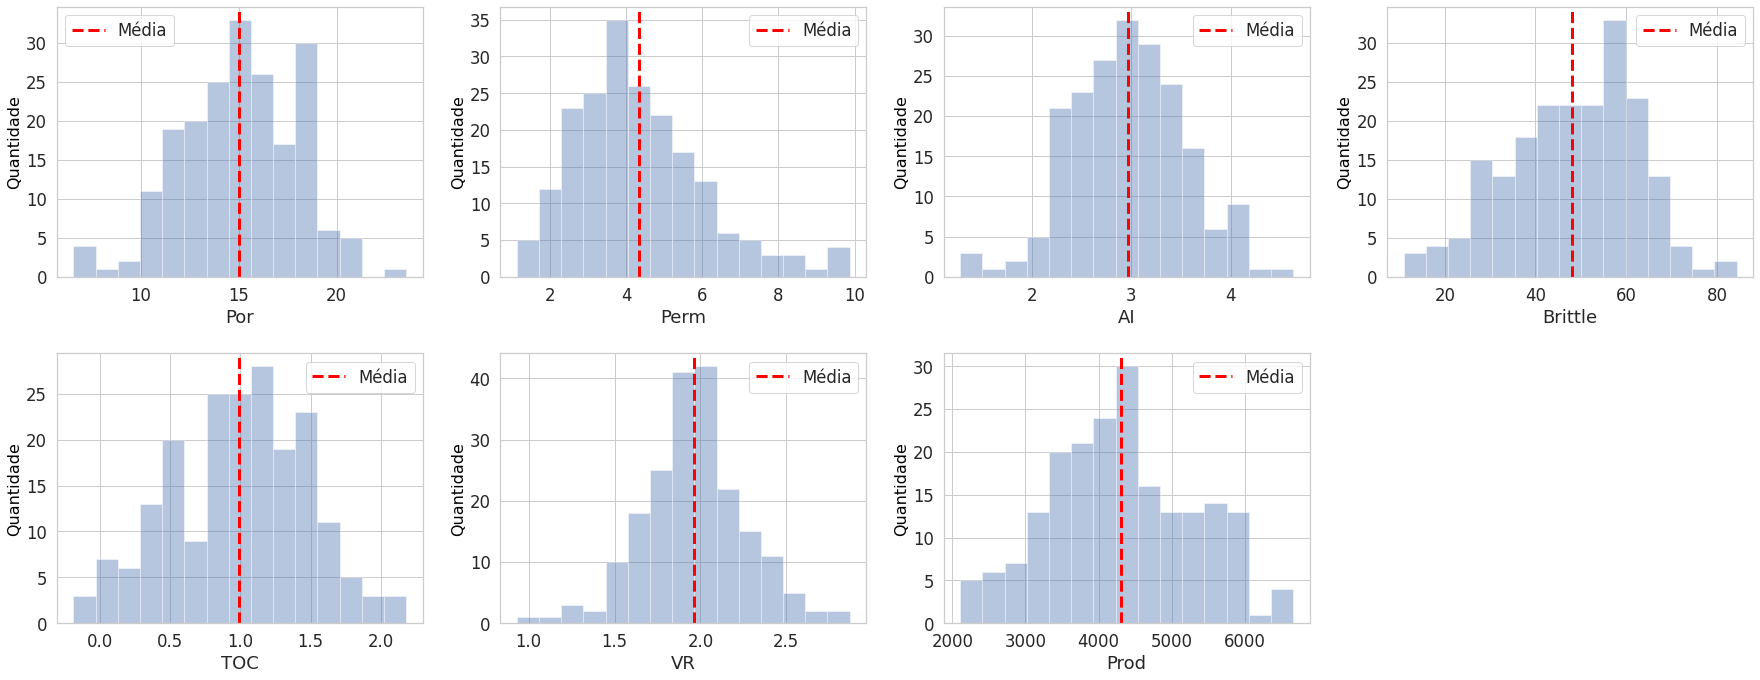

In [ ]:
# Histogramas
sns.set(font_scale=1.5,style="whitegrid")
fig = plt.figure(figsize=(25,10))
for i in range(1,len(df.columns)+1):
  ax = fig.add_subplot(2,4,i)
  sns.distplot(df[df.columns[i-1]],kde= False, bins=15)
  plt.axvline(df[df.columns[i-1]].mean(), color='red', linestyle='dashed', linewidth=3, label = 'Média')  
  plt.legend()
  plt.ylabel('Quantidade',fontsize=16,color = 'black')
  plt.grid(b='on')
fig.tight_layout(pad=1.5)

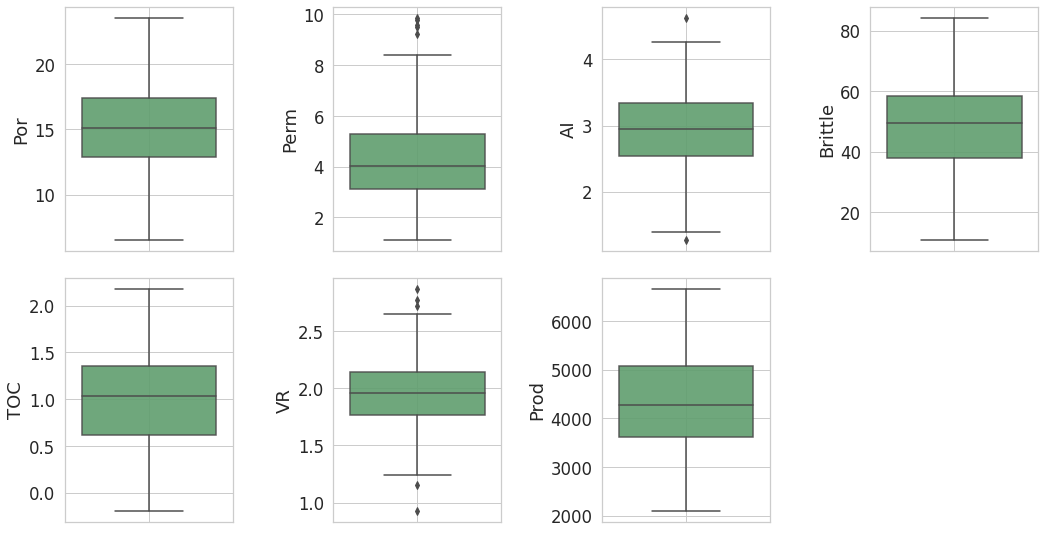

In [ ]:
# Histogramas - sem considerar classes
sns.set(font_scale=1.5,style="whitegrid")
fig = plt.figure(figsize=(15,8))
for i in range(1,len(df.columns)+1):
  ax = fig.add_subplot(2,4,i)
  sns.boxplot(y = df.columns[i-1], data = df,color = 'g',boxprops=dict(alpha=.9))
  plt.grid(b='on')
fig.tight_layout(pad=1.5)

In [ ]:
round(df.describe(),2)

,Por,Perm,AI,Brittle,TOC,VR,Prod
count,200.00,200.00,200.00,200.00,200.00,200.00,200.00
mean,14.99,4.33,2.97,48.16,0.99,1.96,4311.22
std,2.97,1.73,0.57,14.13,0.48,0.30,992.04
min,6.55,1.13,1.28,10.94,-0.19,0.93,2107.14
25%,12.91,3.12,2.55,37.76,0.62,1.77,3618.06
50%,15.07,4.04,2.96,49.51,1.03,1.96,4284.69
75%,17.40,5.29,3.34,58.26,1.35,2.14,5086.09
max,23.55,9.87,4.63,84.33,2.18,2.87,6662.62


Pontos estranhos que podemos observar no dataset?

Achei estranho termos valores negativos para COT (carbono orgânico total), já que é a porcentagem de matéria orgânica que há em uma rocha sedimentar, por conseguinte, o seu potencial gerador. Pensando no conceito da variável, deveria ser positivo.

<br>

**TABELA PARA ENTENDER A VARIÁVEL COT**

<figure>
<center>
<img src='https://drive.google.com/uc?export=view&id=15sd_90RImHtF68kDJ8yRi2ZWfG7_Sfmv' />
<figcaption> Variável TOC </figcaption></center>
</figure>



In [ ]:
# É estranho pensar em TOC negativo, então resolvi analisar quais eram esses valores negativos de TOC e se eles apareciam muito
print(df.loc[df['TOC'] < 0, :].shape)     # quantidade de linhas e colunas
df.loc[df['TOC'] < 0, :]                  # dataframe para a condição TOC < 0

(4, 7)


,Por,Perm,AI,Brittle,TOC,VR,Prod
25,7.27,2.01,3.41,54.56,-0.04,1.68,2351.289487
42,10.14,3.78,4.26,61.89,-0.19,1.97,3098.436639
179,7.22,1.42,3.60,63.09,-0.03,1.67,2362.269336
197,12.12,2.27,3.52,57.07,-0.04,1.73,3409.575363


A gente poderia pensar em:

- Retirar essas linhas com TOC negativo, pois não sabemos se estão erradas. Não gosto muito dessa ideia pois iremos perder 4 registros.
- Será que esses valores são positivos e alguém colocou negativo por engano? Ainda assim seriam valores muito baixos, e segundo a tabela, indicariam nenhum potencial gerador da rocha. Acho que passar os valores para positivos não seria uma má ideia.
- Colocar todos os valores negativos como 0, já que são todos baixos e estariam dentro do limite mínimo permitido? É a ideia que vou seguir.

<br> 

Lembrando que essa escolha é sua. E em um trabalho em que você pode perguntar para o especialista, deve sempre ser perguntado. Talvez ele possa ter uma resposta sobre o que aconteceu nesses casos 

In [ ]:
# transformando valores negativos de TOC em 0:
df['TOC'] = df['TOC'].apply(lambda x: x if x>= 0 else 0)

In [ ]:
round(df.describe(),2)       # notar que não temos mais valores negativos

,Por,Perm,AI,Brittle,TOC,VR,Prod
count,200.00,200.00,200.00,200.00,200.00,200.00,200.00
mean,14.99,4.33,2.97,48.16,0.99,1.96,4311.22
std,2.97,1.73,0.57,14.13,0.48,0.30,992.04
min,6.55,1.13,1.28,10.94,0.00,0.93,2107.14
25%,12.91,3.12,2.55,37.76,0.62,1.77,3618.06
50%,15.07,4.04,2.96,49.51,1.03,1.96,4284.69
75%,17.40,5.29,3.34,58.26,1.35,2.14,5086.09
max,23.55,9.87,4.63,84.33,2.18,2.87,6662.62


In [ ]:
# matriz de correlação
df.corr()

,Por,Perm,AI,Brittle,TOC,VR,Prod
Por,1.000000,0.760546,-0.461549,-0.218570,0.711196,0.111860,0.861910
Perm,0.760546,1.000000,-0.239636,-0.124017,0.472796,0.051023,0.727426
AI,-0.461549,-0.239636,1.000000,0.127599,-0.529927,0.499143,-0.390835
Brittle,-0.218570,-0.124017,0.127599,1.000000,-0.213043,0.317929,0.237155
TOC,0.711196,0.472796,-0.529927,-0.213043,1.000000,0.300569,0.654722
VR,0.111860,0.051023,0.499143,0.317929,0.300569,1.000000,0.323182
Prod,0.861910,0.727426,-0.390835,0.237155,0.654722,0.323182,1.000000


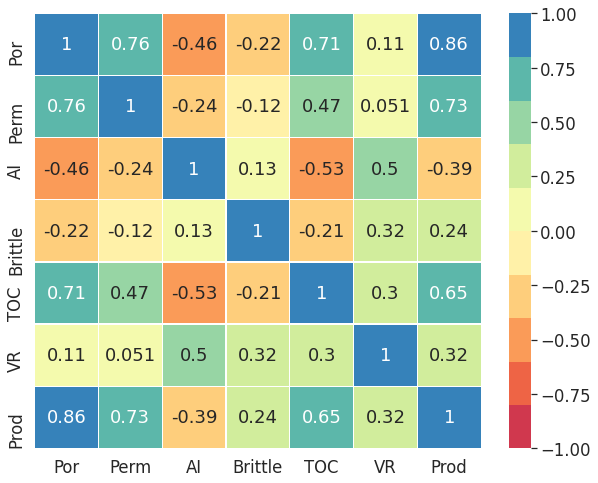

In [ ]:
# figura da correlação
fig = plt.figure(figsize=(10,8))     
sns.heatmap(df.corr(),  annot = True, cmap = sns.color_palette("Spectral", 10), linecolor = 'white', xticklabels = df.columns, linewidths=0.2, yticklabels = df.columns, vmin = -1, vmax = 1)

- Existem algumas correlações entre as variáveis (por exemplo, porosidade e logPermeabilidade), TOC e porosidade
- Em relação a nossa variável alvo (Production) tem uma relação linear com porosidade, seguida de logPerm e TOC). 

-------
## Parte 3 - Estudo de Regressão

### 3.1 - Divisão da série X (variáveis independentes) e y (variável dependente):

In [ ]:
df.head(4)

,Por,Perm,AI,Brittle,TOC,VR,Prod
0,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869


In [ ]:
# Divisão da série X (variáveis independentes) e y (variável dependente):
X = df.drop(['Prod'],1)   # retirar a coluna y (Production)
y = df[["Prod"]]          # coluna y (Production)

### 3.2 - Divisão do dataset em treino e teste 

In [ ]:
# Importando módulo para fazer esta divisão automaticamente (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
from sklearn.model_selection import train_test_split

In [ ]:
# Separando X_train, X_test, y_train e y_test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, shuffle = True)

### 3.3 - Divisão das amostras para validação cruzada

In [ ]:
# Pacote para Validação Cruzada com Kfold
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10,shuffle=True, random_state=0)

In [ ]:
# Imprimindo os índices dos k testes, somente para verificar como a amostras estão distribuídas              
for train_index, test_index in kfold.split(X_train, y_train):   # As divisões dos k folds serão feitas na série de Treinamento: X_train, y_train
    print(test_index)        

[  7  26  44  62  66  85  86  92 101 110 112 119 122 133 143 146]
[  8  24  33  37  45  51  56  59  61  90  97  98 121 128 135 147]
[ 16  19  22  27  40  54  60  63  74  80 111 120 131 136 145 151]
[  2  10  18  30  43  55  71  73  83  94  95 107 109 118 139 157]
[ 48  49  50  64  69  89  96 100 106 108 124 132 141 142 144 154]
[  3   6  13  15  20  23  52  68  75  76  78  84  93 113 158 159]
[  1  11  12  14  35  41  46  57  65  91 102 123 125 129 137 156]
[  0   4   5  17  34  38  42  53 104 105 116 126 130 138 148 153]
[ 25  28  29  31  32  72  77  79  82  99 114 115 127 134 149 155]
[  9  21  36  39  47  58  67  70  81  87  88 103 117 140 150 152]


### 3.4 - Caso 1 - Regressão Linear Simples


- X tem uma única dimensão.

<br>

- Para exemplificar o caso, iremos escolher a variável com o maior módulo de correlação com a variável y (Production). Segundo o gráfico, X será a coluna "Por" que tem correlação de 0.86 com o y.

<br>

- A fórmula da regressão linear simples é dada por:

> $y=\theta_0 +\theta_1 x_1$

- Documentação Sklearn

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html





In [ ]:
X.head(3)

,Por,Perm,AI,Brittle,TOC,VR
0,12.08,2.92,2.80,81.40,1.16,2.31
1,12.38,3.53,3.22,46.17,0.89,1.88
2,14.02,2.59,4.01,72.80,0.89,2.72


In [ ]:
X.columns

Index(['Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR'], dtype='object')

In [ ]:
# Caso 1 - Apenas porosidade e Prod

# Criando X_train2 e X_test2 a partir da remoção  das variáveis ['Perm', 'AI', 'Brittle', 'TOC', 'VR'] na série de Treino e Série de Teste
X_train2 = X_train.drop(['Perm', 'AI', 'Brittle', 'TOC', 'VR'],axis = 1)
X_test2 = X_test.drop(['Perm', 'AI', 'Brittle', 'TOC', 'VR'],axis = 1)

In [ ]:
 #regressão linear simples
from sklearn.linear_model import LinearRegression    

# chamando o módulo da regressão
reg = LinearRegression()                              

# ajustando os dados na série de treino
reg.fit(X_train2,y_train)                             

# prevendo na série de teste
y_pred = reg.predict(X_test2)     

In [ ]:
# coeficientes da regressão linear simples

# coeficientes
print(reg.coef_)

# intercept
print(reg.intercept_)

[[284.82067261]]
[60.36329284]


Avaliando os resultados:

In [ ]:
# Coeficiente de Determinação
from sklearn.metrics import r2_score

# série de Treino
r2_treino1 = r2_score(y_train, reg.predict(X_train2))   # r2(y real,y previsto)

# Série de Teste
r2_teste1 = r2_score(y_test, reg.predict(X_test2))   # r2(y real,y previsto)

print(f'R2 Treino: {round(r2_treino1,3)}')
print(f'R2 Teste: {round(r2_teste1,3)}')

R2 Treino: 0.758
R2 Teste: 0.678


In [ ]:
# Erro Quadrático Médio
from sklearn.metrics import mean_squared_error

# série de Treino
eqm_treino1 = mean_squared_error(y_train, reg.predict(X_train2)) 

# série de Treino
eqm_teste1 = mean_squared_error(y_test, reg.predict(X_test2)) 

print(f'EQM Treino: {round(eqm_treino1,0)}')
print(f'EQM Teste: {round(eqm_teste1,0)}')

EQM Treino: 236822.0
EQM Teste: 313735.0


In [ ]:
# Raiz Quadrada do Erro Quadrático Médio
from sklearn.metrics import mean_squared_error

# série de Treino
rmse_treino1 = np.sqrt(mean_squared_error(y_train, reg.predict(X_train2)))

# série de Treino
rmse_teste1 = np.sqrt(mean_squared_error(y_test, reg.predict(X_test2))) 

print(f'EQM Treino: {round(rmse_treino1,0)}')
print(f'EQM Teste: {round(rmse_teste1,0)}')

EQM Treino: 487.0
EQM Teste: 560.0


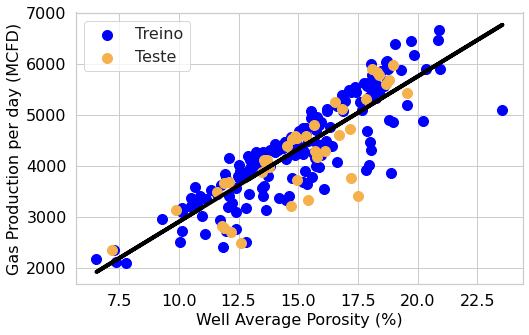

In [ ]:
# Gráfico da regressão Treino e Teste
plt.figure(figsize=(8,5))   # tamanho da figura
plt.scatter(X_train2,y_train,s=100, alpha=1,color = 'blue',label = 'Treino')     # gráfico de dispersão série de treino
plt.scatter(X_test2,y_test,s=100, alpha=1,color = '#F5B14C',label = 'Teste')     # gráfico de dispersão - série de Teste
plt.plot(X_train2, reg.predict(X_train2), c= 'black',lw = 4)  
plt.xlabel('Well Average Porosity (%)',fontsize=16,color = 'black')
plt.ylabel('Gas Production per day (MCFD)',fontsize=16,color = 'black')
plt.legend(fontsize=16)
plt.xticks(fontsize=16,color = 'black')
plt.yticks(fontsize=16,color = 'black')
plt.grid(b='on')

In [ ]:
# Validação cruzada na série de treino - apenas para guardar as métricas e comparar posteriormente com os outros casos
from sklearn.model_selection import cross_val_score                      # chamando pacote para validação cruzada

vc_mse_caso1 = np.sqrt(-1*cross_val_score(reg, X = X_train2, y = y_train, scoring='neg_mean_squared_error', cv = kfold))         # validação cruzada caso 1 - métrica RMSE
print('')
print(vc_mse_caso1)
print('')
print(f'validação cruzada caso 1: {round(np.mean(vc_mse_caso1),0)} +-{round(np.std(vc_mse_caso1),0)} ')


[520.74797057 341.46509557 415.56203271 428.73744259 505.21492784
 564.43128229 706.41084287 456.11895369 456.05521953 473.69209871]

validação cruzada caso 1: 487.0 +-93.0 


### 3.4 - Caso 2 - Regressão Linear Múltipla


- X tem mais de uma dimensão.

<br>

- Para exemplificar o caso, vamos usar todas as variáveis do nosso conjunto X.

<br>

- A fórmula da regressão linear múltipla é dada por:

> $y=\theta_0 +\theta_1 x_1 +\theta_2 x_2 + ... + +\theta_n x_n$

In [ ]:
X_train.head(3)

,Por,Perm,AI,Brittle,TOC,VR
134,12.83,2.69,3.67,17.20,0.61,2.01
66,14.19,3.29,2.69,28.70,1.22,1.83
26,15.78,5.00,2.55,52.64,1.37,2.04


In [ ]:
 #regressão linear múltipla
from sklearn.linear_model import LinearRegression

# chamando o módulo da regressão
reg2 = LinearRegression()

# ajustando os dados na série de treino
reg2.fit(X_train,y_train)                                                                            

# prevendo na série de teste
y_pred = reg2.predict(X_test)      

In [ ]:
# coeficientes da regressão linear múltipla

# coeficientes
print(reg2.coef_)

# intercept
print(reg2.intercept_)

res = ''
for i in range(0,len(reg2.coef_[0])):
  res = res + '' + str(int(reg2.coef_[0][i])) + 'x'+str(i) + ' + '

res = res[:-3]
print('')
print(f'Equação: y = {int(reg2.intercept_[0])} + {res}')

[[ 235.1699897   107.69614145 -282.83450302   25.82148601   17.42372744
   680.52744893]]
[-1433.75952392]

Equação: y = -1433 + 235x0 + 107x1 + -282x2 + 25x3 + 17x4 + 680x5


In [ ]:
# Métricas de Avaliação

# Coeficiente de Determinação
from sklearn.metrics import r2_score

# série de Treino
r2_treino2 = r2_score(y_train, reg2.predict(X_train))     # r2(y real,y previsto)

# Série de Teste
r2_teste2 = r2_score(y_test, reg2.predict(X_test))       # r2(y real,y previsto)

print(f'R2 Treino: {round(r2_treino2,3)}')
print(f'R2 Teste: {round(r2_teste2,3)}')

# Erro Quadrático Médio
from sklearn.metrics import mean_squared_error

# série de Treino
eqm_treino2 = mean_squared_error(y_train, reg2.predict(X_train)) 

# série de Treino
eqm_teste2 = mean_squared_error(y_test, reg2.predict(X_test)) 

print('')
print(f'EQM Treino: {round(eqm_treino2,0)}')
print(f'EQM Teste: {round(eqm_teste2,0)}')


# Raiz Quadrada do Erro Quadrático Médio
from sklearn.metrics import mean_squared_error

# série de Treino
rmse_treino2 = np.sqrt(mean_squared_error(y_train, reg2.predict(X_train)))

# série de Treino
rmse_teste2 = np.sqrt(mean_squared_error(y_test, reg2.predict(X_test))) 

print('')
print(f'RMSE Treino: {round(rmse_treino2,0)}')
print(f'RMSE Teste: {round(rmse_teste2,0)}')

R2 Treino: 0.96
R2 Teste: 0.955

EQM Treino: 38853.0
EQM Teste: 43822.0

RMSE Treino: 197.0
RMSE Teste: 209.0


In [ ]:
print(f'R2 teste1: {round(r2_teste1,3)}, RMSE teste1: {round(rmse_teste1,3)}')

R2 teste1: 0.678, RMSE teste1: 560.121


In [ ]:
# Validação cruzada na série de treino - apenas para guardar as métricas e comparar posteriormente com os outros casos
from sklearn.model_selection import cross_val_score                      # chamando pacote para validação cruzada

vc_mse_caso2 = np.sqrt(-1*cross_val_score(reg2, X = X_train, y = y_train, scoring='neg_mean_squared_error', cv = kfold))         # validação cruzada caso 1
print(vc_mse_caso2)
print('')
print(f'validação cruzada caso 2: {round(np.mean(vc_mse_caso2),0)} +-{round(np.std(vc_mse_caso2),0)} ')

[189.18814026 242.65500301 192.60626749 140.76357888 182.1730516
 226.33810666 317.43567621 180.70781261 186.29086297 188.04598952]

validação cruzada caso 2: 205.0 +-46.0 


In [ ]:
# caso 1
print(f'validação cruzada caso 1: {round(np.mean(vc_mse_caso1),0)} +-{round(np.std(vc_mse_caso1),0)} ')

validação cruzada caso 1: 487.0 +-93.0 


### 3.4 - Caso 3 - PCA + Regressão Linear Múltipla

Estudo PCA

- Determinando quantos componentes principais utilizar.
- O número de componentes principais depende da variância explicada por cada componente.

<br>

Documentação:
- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html


In [ ]:
# PCA

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Passo 1 - Normalização dos dados
# transformar os dados com normalização StandardScaler (normaliza os dados para ter média 0)
sc_x = StandardScaler()                       # chamando a função de normalização
X_train3_1 = sc_x.fit_transform(X_train)      # Normaliza X_train
X_test3_1 = sc_x.transform(X_test)            # normaliza os dados com os parâmetros de X_train

# Converter array de volta para dataframe
X_train3_1 = pd.DataFrame(X_train3_1,columns = X_train.columns) 
X_test3_1 = pd.DataFrame(X_test3_1,columns = X_test.columns) 
X_train3_1.head(4)

,Por,Perm,AI,Brittle,TOC,VR
0,-0.707820,-0.948191,1.211572,-2.279815,-0.805503,0.115778
1,-0.258332,-0.594292,-0.470511,-1.441554,0.468061,-0.476479
2,0.267173,0.414320,-0.710809,0.303487,0.781232,0.214487
3,1.615636,1.487813,-0.333198,-0.221337,0.697720,0.346100


In [ ]:
# Determinando o número de Componentes Principais (PCs)

# Vamos inicialmente usar o número de colunas totais como número de componentes principais
pca = PCA(n_components = len(X_train3_1.columns))    # número de componentes é o número de colunas

# ajuste na série de treino
X_train3_2 = pca.fit_transform(X_train3_1)                # lembrando que cada PC é combinação linear das variáveis do dataset e X_train3_1 é o conjunto de dados normalizados
explained_variance = pca.explained_variance_ratio_        # o quanto cada PC explica a variância dos dados
explained_variance

array([0.46278487, 0.24957268, 0.15160075, 0.10273996, 0.02576011,
       0.00754163])

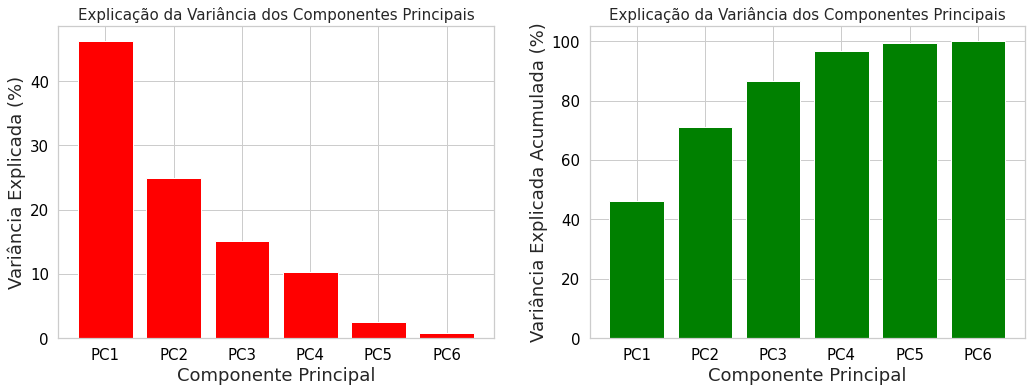

In [ ]:
# Variância Explicada para cada PCi
per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)

# Variância Explicada acumulada para cada PCi
per_var_acumulada = np.cumsum(per_var)

# nome dos PCs
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

# Figura 1 - variância de cada PC
fig = plt.figure(figsize=(15,6))
# Figura da variância de cada PC
ax = fig.add_subplot(1,2,1)
plt.bar(x = range(1,len(per_var)+1), color='red',height = per_var, tick_label = labels)
plt.ylabel('Variância Explicada (%)')
plt.xlabel('Componente Principal')
plt.title('Explicação da Variância dos Componentes Principais',fontsize=15)
plt.xticks(fontsize=15,color = 'black')
plt.yticks(fontsize=15,color = 'black')
plt.grid(b='on')

# Figura 2 - Variância acumulada dos PCs
ax = fig.add_subplot(1,2,2)
plt.bar(x = range(1,len(per_var_acumulada)+1), height = per_var_acumulada, color='green',tick_label = labels)
plt.ylabel('Variância Explicada Acumulada (%)')
plt.xlabel('Componente Principal')
plt.title('Explicação da Variância dos Componentes Principais',fontsize=15)
plt.xticks(fontsize=15,color = 'black')
plt.yticks(fontsize=15,color = 'black')
plt.grid(b='on')
fig.tight_layout(pad=1.5)

In [ ]:
np.cumsum(per_var)

array([ 46.3,  71.3,  86.5,  96.8,  99.4, 100.2])

In [ ]:
# Resolvemos utilizar 4 componentes principais, que explicam 96,8% da variância dos dados

In [ ]:
# PCA

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Passo 1 - Normalização dos dados

# transformar os dados com normalização StandardScaler (normaliza os dados para ter média 0)
sc_x = StandardScaler()                       # chamando a função de normalização
X_train3_1 = sc_x.fit_transform(X_train)      # Normaliza X_train
X_test3_1 = sc_x.transform(X_test)            # normaliza os dados com os parâmetros de X_train
# convert the array back to a dataframe
X_train3_1 = pd.DataFrame(X_train3_1,columns = X_train.columns) 
X_test3_1 = pd.DataFrame(X_test3_1,columns = X_test.columns) 

# Passo 2 - PCA  (obs: importante lembrar que ajustamos para o treino o PC e depois transformamos para o teste)

# Vamos utilizar (conforme a análise feita) 4 componentes principais
pca = PCA(n_components = 4)    # número de componentes escolhidos

# ajuste na série de treino
X_train3_2 = pca.fit_transform(X_train3_1)                # fit_transform (ajusta e transforma a série de treino)
X_train3_2 = pd.DataFrame(X_train3_2) 

# Transformação na série de teste
X_test3_2 = pca.transform(X_test3_1)                      # utiliza os parâmetros ajustados no fit para transformar a série de teste
X_test3_2 = pd.DataFrame(X_test3_2) 


In [ ]:
X_test3_2.head(3)

,0,1,2,3
0,-0.307808,-0.506283,-1.047130,0.788878
1,-1.127711,0.760718,2.054693,1.109615
2,1.322143,0.376569,0.012302,-1.036451


In [ ]:
#regressão linear múltipla em X =  PC1, PC2, PC3 e PC4

from sklearn.linear_model import LinearRegression

# chamando o módulo da regressão
reg3 = LinearRegression()

# ajustando os dados na série de treino
reg3.fit(X_train3_2,y_train)                                                                            

# prevendo na série de teste
y_pred = reg3.predict(X_test3_2)

In [ ]:
# coeficientes da regressão linear múltipla

# coeficientes
print(reg3.coef_)

# intercept
print(reg3.intercept_)

res = ''
for i in range(0,len(reg3.coef_[0])):
  res = res + '' + str(int(reg3.coef_[0][i])) + 'x'+str(i) + ' + '

res = res[:-3]
print('')
print(f'Equação: y = {int(reg3.intercept_[0])} + {res}')

[[ 457.95353327 -351.78435353 -327.08790356  257.97284979]]
[4324.59159545]

Equação: y = 4324 + 457x0 + -351x1 + -327x2 + 257x3


In [ ]:
# Métricas de Avaliação

# Coeficiente de Determinação
from sklearn.metrics import r2_score

# série de Treino
r2_treino3 = r2_score(y_train, reg3.predict(X_train3_2))   # r2(y real,y previsto)

# Série de Teste
r2_teste3 = r2_score(y_test, reg3.predict(X_test3_2))   # r2(y real,y previsto)

print(f'R2 Treino: {round(r2_treino3,3)}')
print(f'R2 Teste: {round(r2_teste3,3)}')

# Erro Quadrático Médio
from sklearn.metrics import mean_squared_error

# série de Treino
eqm_treino3 = mean_squared_error(y_train, reg3.predict(X_train3_2)) 

# série de Treino
eqm_teste3 = mean_squared_error(y_test, reg3.predict(X_test3_2)) 

print('')
print(f'EQM Treino: {round(eqm_treino3,0)}')
print(f'EQM Teste: {round(eqm_teste3,0)}')


# Raiz Quadrada do Erro Quadrático Médio
from sklearn.metrics import mean_squared_error

# série de Treino
rmse_treino3 = np.sqrt(mean_squared_error(y_train, reg3.predict(X_train3_2)))

# série de Treino
rmse_teste3 = np.sqrt(mean_squared_error(y_test, reg3.predict(X_test3_2))) 

print('')
print(f'RMSE Treino: {round(rmse_treino3,0)}')
print(f'RMSE Teste: {round(rmse_teste3,0)}')

R2 Treino: 0.925
R2 Teste: 0.911

EQM Treino: 73487.0
EQM Teste: 86718.0

RMSE Treino: 271.0
RMSE Teste: 294.0


In [ ]:
# Validação Cruzada


- **VALIDAÇÃO CRUZADA**

O caso da validação cruzada neste caso será um pouco diferente.

 Devemos lembrar que cada treino e teste vai seguir os seguintes passos:

> 1 - Normalização dos dados em treino e uso dos parâmetros de normalizaçao do treino para ajustar o teste;

> 2 - Ajuste do PCA nos dados normalizados do treino e tranformação dos dados no teste (lembrar que novos dados do teste estarão como X e precisaremos transformar para PCs);

> 3 - Usar os dados dos PCs do treino para ajustar o modelo no treino;

> 4 - Prever o resultado no teste.


A validação cruzada consiste em diferentes treinos e testes na série de treinamento. Dessa forma, devemos seguir este mesmo caminho:

     normalização -> PCA -> ajuste do modelo (neste caso, regressão linear múltipla)

<br>

Estes procedimentos corresponde a um **PIPELINE** que seguem esses três procedimentos:

  1. Normalização stardard scale
  2. PCA
  3. Regressão linear


- Existe um comando no sklearn que cria esse pipeline. Assim, na validação cruzada, utilizando o comando pipeline, o modelo utilizado será a combinação desses 3 processos exatamente nessa ordem.
- Faremos essas três etapas no treinos e usaremos as transformações/ajustes no testes.


<br>

- Documentação pipeline: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html


In [ ]:
from sklearn.decomposition import PCA                # comando para PCA
from sklearn.preprocessing import StandardScaler     # normalização standarscaler
from sklearn.pipeline import Pipeline                # Comando para importar o pipeline
from sklearn.model_selection import cross_val_score  # validação cruzada

# definindo o PIPELINE (1-normalização; 2-pca; 3-regressão linear )
steps = [('norm', StandardScaler()), ('pca', PCA(n_components=4)), ('m', LinearRegression())]
model = Pipeline(steps=steps)      # o modelo será a combinação desses 3 processos, nessa ordem

# Validação cruzada na série de treino - apenas para guardar as métricas e comparar posteriormente com os outros casos                
vc_mse_caso3 = np.sqrt(-1*cross_val_score(model, X = X_train, y = y_train, scoring='neg_mean_squared_error', cv = kfold))         # validação cruzada caso 1
print(vc_mse_caso3)
print('')
print(f'validação cruzada caso 3: {round(np.mean(vc_mse_caso3),0)} +-{round(np.std(vc_mse_caso3),0)} ')

[270.55804955 287.4829039  309.53106621 237.28112956 265.27884736
 282.64955933 400.51548879 227.43429877 294.75923749 261.88100075]

validação cruzada caso 3: 284.0 +-46.0 


In [ ]:
print(f'validação cruzada caso 3: {round(np.mean(vc_mse_caso2),0)} +-{round(np.std(vc_mse_caso2),0)} ')

validação cruzada caso 3: 205.0 +-46.0 


### 3.5 - Caso 4 - SVR

Documentação:
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [ ]:
from sklearn.svm import SVR   # os parâmetros padrões do SVR são C:1,epsilon:0.1 e g = auto
from sklearn.preprocessing import StandardScaler

# Passo 1 - Normalização dos dados
# transformar os dados com normalização StandardScaler (normaliza os dados para ter média 0)
# Chamando a função de normalização para normalizar x
sc_x = StandardScaler()                       
X_train4 = sc_x.fit_transform(X_train)      # Normaliza X_train
X_test4 = sc_x.transform(X_test)            # normaliza os dados com os parâmetros de X_train

# Convertendo array de volta para dataframe
X_train4 = pd.DataFrame(X_train4,columns = X_train.columns) 
X_test4 = pd.DataFrame(X_test4,columns = X_test.columns) 

# chamando a função de normalização para normalizar y
sc_y = StandardScaler()                    
y_train4 = sc_y.fit_transform(y_train)


# Passo 2 - chamando o módulo da regressão
reg4 = SVR(kernel = 'rbf',C=1.0, epsilon=0.1)

# Passo 3 - Ajuste do modelo:
reg4.fit(X_train4, y_train4)

# Passo 4 - Prevendo na série de teste: 
y_pred = sc_y.inverse_transform(reg4.predict(X_test4))      # notar que prevemos no X_test normalizado, e depois transformamos novamente para a escala original de y

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Métricas de Avaliação

# Coeficiente de Determinação
from sklearn.metrics import r2_score

# série de Treino
r2_treino4 = r2_score(y_train, sc_y.inverse_transform(reg4.predict(X_train4)))   # r2(y real,y previsto)

# Série de Teste
r2_teste4 = r2_score(y_test, sc_y.inverse_transform(reg4.predict(X_test4)))   # r2(y real,y previsto)

print(f'R2 Treino: {round(r2_treino4,3)}')
print(f'R2 Teste: {round(r2_teste4,3)}')

# Erro Quadrático Médio
from sklearn.metrics import mean_squared_error

# série de Treino
eqm_treino4 = mean_squared_error(y_train, sc_y.inverse_transform(reg4.predict(X_train4))) 

# série de Treino
eqm_teste4 = mean_squared_error(y_test, sc_y.inverse_transform(reg4.predict(X_test4))) 

print('')
print(f'EQM Treino: {round(eqm_treino4,0)}')
print(f'EQM Teste: {round(eqm_teste4,0)}')


# Raiz Quadrada do Erro Quadrático Médio
from sklearn.metrics import mean_squared_error

# série de Treino
rmse_treino4 = np.sqrt(mean_squared_error(y_train, sc_y.inverse_transform(reg4.predict(X_train4))))

# série de Treino
rmse_teste4 = np.sqrt(mean_squared_error(y_test, sc_y.inverse_transform(reg4.predict(X_test4)))) 

print('')
print(f'RMSE Treino: {round(rmse_treino4,0)}')
print(f'RMSE Teste: {round(rmse_teste4,0)}')

R2 Treino: 0.99
R2 Teste: 0.961

EQM Treino: 9469.0
EQM Teste: 37698.0

RMSE Treino: 97.0
RMSE Teste: 194.0


In [ ]:
# Validação Cruzada

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# definindo o pipeline (1-normalização; 2-pca; 3-regressão linear )
steps = [('norm', StandardScaler()), ('m', SVR())]
model2 = Pipeline(steps=steps)      # o modelo será a combinação desses 3 processos, nessa ordem

# Validação cruzada na série de treino - apenas para guardar as métricas e comparar posteriormente com os outros casos                
vc_mse_caso4 = np.sqrt(-1*cross_val_score(model2, X = X_train, y = y_train, scoring='neg_mean_squared_error', cv = kfold))         # validação cruzada caso 1
print(vc_mse_caso4)
print('')
print(f'validação cruzada caso 4: {round(np.mean(vc_mse_caso4),0)} +-{round(np.std(vc_mse_caso4),0)} ')

[1208.85789056 1246.35243519  846.96810296  804.38141086  803.90064778
 1246.82218778  999.09808395  877.82159241  944.93765778  628.58390089]

validação cruzada caso 4: 961.0 +-201.0 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
print(f'validação cruzada caso 1: {round(np.mean(vc_mse_caso1),0)} +-{round(np.std(vc_mse_caso1),0)} ')

validação cruzada caso 1: 487.0 +-93.0 


**COMPARANDO RESULTADOS DA VALIDAÇÃO CRUZADA:**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


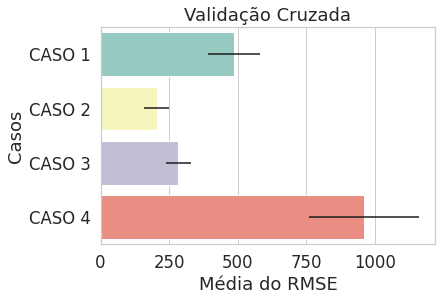

In [ ]:
# Resultados da validação cruzada no caso 1 e caso 2 
sns.set(font_scale=1.5, style = "whitegrid")
cv_mse_casos = pd.DataFrame({"Médias Validação Cruzada":[round(np.mean(vc_mse_caso1),3),round(np.mean(vc_mse_caso2),3),round(np.mean(vc_mse_caso3),3),round(np.mean(vc_mse_caso4),3)],
                            "Desvio-padrão Validação Cruzada": [round(np.std(vc_mse_caso1),3),round(np.std(vc_mse_caso2),3),round(np.std(vc_mse_caso3),3),round(np.std(vc_mse_caso4),3)],
                            "Casos":["CASO 1","CASO 2","CASO 3","CASO 4"]})

g = sns.barplot("Médias Validação Cruzada","Casos",data = cv_mse_casos, palette="Set3",
                orient = "h",**{'xerr':[round(np.std(vc_mse_caso1),3),round(np.std(vc_mse_caso2),3),round(np.std(vc_mse_caso3),3),round(np.std(vc_mse_caso4),3)]})
g.set_xlabel("Média do RMSE")
g = g.set_title("Validação Cruzada")

# <font color=green> **2 - Aprendizado Não Supervisionado**

Seguindo o exemplo mostrado no site: 
https://csegrecorder.com/articles/view/geochemical-facies-analysis-using-unsupervised-machine-learning

Objetivo:

  - Analisar medições de fluorescência de raios-X de amostras de cascalhos.


São realizados dois processos:

  - **Redução de Dimensionalidade:** 
      - Reduzir o número de variáveis aleatórias para obter um conjunto menor de variáveis que descrevem a maior parte da variação dos dados;

  - **Análise de Agrupamento:** 
      - Técnica não supervisionada que agrupa dados de acordo com características similares.
      -  No dataset que iremos estudar, esses grupos podem ser fáceis geoquímicas distintas.


-------
## Parte 1 - Leitura do dataset e Importando Pacotes

**Entendendo o Problema:**

- Análises de amostras geológicas utilizando a técnica de fluorescência de raios X *(XRF Cuttings Analysis)*:

- Pode-se utilizar XRF (*X-ray fluorescence*) portátil para analisar cascalhos de poços. O método fornece medições rápidas da composição dos elementos dos cascalhos à medida que os poços são perfurados.

- Os dispositivos medem os raios-X emitidos por amostras. Os elementos das amostras irão emitir raios-X com comprimentos de ondas distintos, e o espectro dos raios-X emitidos podem ser usados para quantificar a quantidade dos elementos correspondentes nas amostras.

- As concentrações dos elementos das amostras podem ser utilizadas para inferir o ambiente de deposição do sedimento.

- Ou seja, podemos utilizar as informações dos raios-X para caracterização geológica.

<br>

**Entendendo o Dataset:**

- Dados são medições de XRF de cascalhos da seção lateral de um poço não convencional. 
- Medições foram feitas em intervalos de aproximadamente 10 m.
- 22 medições para cada amostra
- Cada medição fornece a porcentagem do peso de um componente químico.


In [1]:
# Importando pacotes
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

# Funções do sklearn que iremos utilizar
from sklearn.preprocessing import scale     # outra forma de normalizar os dados
from sklearn.decomposition import FactorAnalysis
from sklearn.cluster import KMeans

In [2]:
# Outras bibliotecas que iremos usar
import matplotlib as mpl
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# Importando o Dataset
endereco_dados = 'https://raw.githubusercontent.com/brendonhall/clustering_tutorial/master/XRF_dataset.csv'

In [4]:
df2 = pd.read_csv(endereco_dados)

In [5]:
df2.head()

,Well Name,Depth,Quartz,K-Feldspar,Plagioclase,Chlorite,IlliteSmectiteMica,Calcite,Ankerite/Dolomite,Pyrite,Organics,Al2O3,SiO2,TiO2,Fe2O3,MnO,MgO,CaO,Na2O,K2O,P2O5,SO3,Cl,Zr
0,Well 1,3173.97,27.56,0.40,8.17,5.46,20.73,26.11,9.30,1.94,0.34,7.27,42.24,0.42,3.40,0.02,0.53,19.49,0.78,1.19,0.20,1.20,0.28,201.70
1,Well 1,3183.11,42.92,0.64,9.63,4.10,15.61,18.31,5.07,1.51,2.21,5.08,50.17,0.39,2.08,0.02,0.09,15.52,0.93,1.01,0.19,0.81,0.26,395.35
2,Well 1,3192.26,44.55,0.56,10.07,4.33,15.17,16.78,6.14,0.80,1.60,5.05,46.91,0.38,2.14,0.02,0.15,15.52,0.87,0.98,0.18,0.76,0.23,362.70
3,Well 1,3201.40,42.65,0.38,9.04,4.02,14.56,21.27,4.49,1.06,2.53,5.23,48.14,0.45,2.26,0.02,0.14,15.46,0.87,1.05,0.22,0.96,0.26,410.10
4,Well 1,3210.54,42.61,1.26,8.95,3.66,15.53,19.77,4.35,1.10,2.77,5.00,45.77,0.38,2.39,0.02,0.21,18.65,0.82,1.06,0.25,1.16,0.24,401.50


In [6]:
# Dimensão dos dados
df2.shape

(269, 24)

Algumas razões de elementos podem indicar vários efeitos.

São usados 3 razões: Si/Zr, Si/Al e Zr/ Al.

- Si/Zr : indica proporções relativas de sílica biogênica e entrada de detritos terrestes

- Si/ Al : indica sílica biogênica para argila aluminosa

- Zr/Al : o comportamento químico do Zr indica que esta razão pode ser utilizada para tamanho do grão

In [7]:
df2['Si/Zr'] = df2['SiO2'] / df2['Zr']
df2['Si/Al'] = df2['SiO2'] / df2['Al2O3']
df2['Zr/Al'] = df2['Zr'] / df2['Al2O3']

In [8]:
df2.head(3)

,Well Name,Depth,Quartz,K-Feldspar,Plagioclase,Chlorite,IlliteSmectiteMica,Calcite,Ankerite/Dolomite,Pyrite,Organics,Al2O3,SiO2,TiO2,Fe2O3,MnO,MgO,CaO,Na2O,K2O,P2O5,SO3,Cl,Zr,Si/Zr,Si/Al,Zr/Al
0,Well 1,3173.97,27.56,0.40,8.17,5.46,20.73,26.11,9.30,1.94,0.34,7.27,42.24,0.42,3.40,0.02,0.53,19.49,0.78,1.19,0.20,1.20,0.28,201.70,0.209420,5.810179,27.744154
1,Well 1,3183.11,42.92,0.64,9.63,4.10,15.61,18.31,5.07,1.51,2.21,5.08,50.17,0.39,2.08,0.02,0.09,15.52,0.93,1.01,0.19,0.81,0.26,395.35,0.126900,9.875984,77.824803
2,Well 1,3192.26,44.55,0.56,10.07,4.33,15.17,16.78,6.14,0.80,1.60,5.05,46.91,0.38,2.14,0.02,0.15,15.52,0.87,0.98,0.18,0.76,0.23,362.70,0.129336,9.289109,71.821782


-------
## Parte 2 - Redução da Dimensionalidade


- EFA (Exploratory Factor Analysis ou análise fatorial exploratória):

    - Reduz o número de variáveis ao identificar os fatores latentes presentes no dataset;
    - Por exemplo, um fator shale pode estar associado a leituras de alto dióxido de silício, cálcio e quartzo.
    - EFA assume que as observações são uma combinação linear dos fatores subjacentes + ruído gaussiano.



Etapa 1 - normalizar os dados para terem média 0 e desvio-padrão próximo de 1

In [12]:
from sklearn.preprocessing import scale
data = df2.iloc[:, 2:]             # desconsidera o nome do poço e a profundidade
data = scale(data)
data = pd.DataFrame(data, columns = df2.columns[2:])

In [13]:
data.head(3)

,Quartz,K-Feldspar,Plagioclase,Chlorite,IlliteSmectiteMica,Calcite,Ankerite/Dolomite,Pyrite,Organics,Al2O3,SiO2,TiO2,Fe2O3,MnO,MgO,CaO,Na2O,K2O,P2O5,SO3,Cl,Zr,Si/Zr,Si/Al,Zr/Al
0,-2.663141,-0.842506,0.731756,3.482352,1.613159,-0.258391,2.298187,1.824808,-2.169645,1.233324,-0.100823,0.724510,2.564780,-1.58631,0.041591,0.050312,0.791812,0.535715,0.860932,0.619599,2.402809,0.154550,-0.418814,-0.977051,-0.743403
1,0.288670,-0.691223,1.260794,1.780257,0.587964,-1.182751,0.553875,0.480891,0.318152,0.218174,0.753793,0.420780,0.415123,-1.58631,-0.569552,-0.585696,1.607165,0.130730,0.768147,-0.622084,2.122880,2.607065,-0.892504,-0.265018,0.979096
2,0.601915,-0.741651,1.420231,2.068112,0.499862,-1.364068,0.995108,-1.738133,-0.493375,0.204267,0.402463,0.319537,0.512835,-1.58631,-0.486215,-0.585696,1.281024,0.063232,0.675363,-0.781275,1.702987,2.193564,-0.878525,-0.367796,0.772625


In [15]:
from sklearn.preprocessing import scale
data = df2.iloc[:, 2:]             # desconsidera o nome do poço e a profundidade
data = scale(data)

In [29]:
eigenvalues

array([7.92808118e+00, 4.92976024e+00, 2.25709545e+00, 1.88791764e+00,
       1.59748912e+00, 1.07507520e+00, 9.65913921e-01, 8.89683567e-01,
       6.44987305e-01, 5.09897132e-01, 4.19762590e-01, 3.67551149e-01,
       2.82977889e-01, 2.85544875e-01, 2.48536914e-01, 1.86340112e-01,
       1.66295401e-01, 4.81614098e-07, 1.17363229e-01, 1.05439764e-01,
       1.18862738e-02, 7.67239156e-02, 5.99060606e-02, 3.64748663e-02,
       4.25793054e-02])

- Para fazermos EFA, precisamos especificar a priori o número de fatores a serem extraídos.


- Geralmente não é óbvio determinar esse número de fatores. Uma técnica simples (Critério Kaiser) envolve calcular os autovalores da matriz de covariância dos dados e contar o número de autovalores acima ou iguais a um *threshold* (geralmente 1).


No handles with labels found to put in legend.


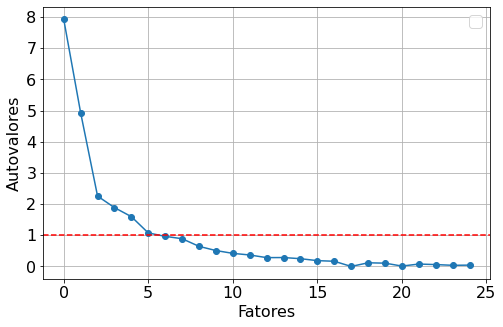

In [34]:
# cálculo da matriz de covariância
covar_matrix = np.cov(data, rowvar=False)
len(covar_matrix)   # são as 25 variáveis (22 dos elementos + 3 criadas pela combinação linear)

# Cálculo dos autovalores
eigenvalues = np.linalg.eig(covar_matrix)[0]
eigenvalues

# Gráfico dos autovalores
plt.figure(figsize=(8,5))   # tamanho da figura
plt.plot(eigenvalues, 'o-')
plt.axhline(y=1.0, color='r', linestyle='--')
plt.xlabel('Fatores',fontsize=16,color = 'black')
plt.ylabel('Autovalores',fontsize=16,color = 'black')
plt.legend(fontsize=16)
plt.xticks(fontsize=16,color = 'black')
plt.yticks(fontsize=16,color = 'black')
plt.grid(b='on')


Pelo gráfico percebemos que 6 autovalores são maiores que 1, sugerindo que há 6 relevantes fatores a serem extraídos.

- Scikit-learn tem um módulo para realizar análise fatorial. 

**Módulo:** 

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html

<br>

**Documentação:**

https://scikit-learn.org/stable/modules/decomposition.html#fa



In [35]:
from sklearn.decomposition import FactorAnalysis      # importando módulo para fazer EFA
fa_model = FactorAnalysis(n_components = 6)           # 6 componentes escolhidos de acordo com Critério Kaise
fa_model.fit(data)                                    # ajusta os dados
factor_data = fa_model.transform(data)                # transforma os dados X nos fatores

In [37]:
print(factor_data)
print(np.shape(factor_data))

[[ 0.81391251  2.41001824  1.88261683 -0.55172594  3.08667639  1.05452758]
 [ 0.34793    -0.53709861  2.01797107 -0.65004516  0.77538394 -1.87952403]
 [ 0.27382037 -0.77203735  1.71029478 -0.03341179  0.95794935 -1.60049081]
 ...
 [ 0.63536168 -0.59544067  0.63853228  1.66350616  1.25806483 -0.74030513]
 [ 0.74722764  0.12669571  0.69764668  1.40888555  1.07465371 -0.52168257]
 [ 0.01322684 -0.8632895   0.15979124  2.11787127  1.07261972 -1.13884827]]
(269, 6)


Interpretação dos fatores

- Os fatores descreve a relação de cada medida com o determinado fator
- cada fator representa a correlação entre o fator e as variáveis observadas
- O vator varia entre - 1 e + 1
  
  - Valores positivos: medição está associada a presença de determinado fator;
  - Valores negativos: medição indica ausência de um fator.



Interpreting the factors
The factors can now be examined to interpret the underlying properties they represent. The factor loadings describe the relationship of each measurement to the underlying factor. Each loading score represents the correlation between the factor and the observed variables. The loading scores vary between -1 and 1. A positive value means that a measurement is associated with the presence of an underlying factor. A negative value suggests that a measurement indicates the absence of a factor. The factor loadings can be easily extracted from the factor model and plotted to show the loadings associated with a given factor.

In [50]:
loading = fa_model.components_
component_names = df2.columns.values[2:]
loading_df = pd.DataFrame(loading, columns=component_names)
loading_df

,Quartz,K-Feldspar,Plagioclase,Chlorite,IlliteSmectiteMica,Calcite,Ankerite/Dolomite,Pyrite,Organics,Al2O3,SiO2,TiO2,Fe2O3,MnO,MgO,CaO,Na2O,K2O,P2O5,SO3,Cl,Zr,Si/Zr,Si/Al,Zr/Al
0,0.028835,0.049461,0.225519,0.303425,0.456712,-0.457971,0.015752,0.489640,0.392607,0.945176,0.336224,0.711635,0.860960,0.171701,0.724061,-0.582963,0.748375,0.992963,0.422171,0.554763,0.164332,0.206393,-0.012439,-0.638238,-0.576867
1,-0.985198,-0.415851,0.106664,0.169881,-0.209021,0.690095,0.310278,0.086433,-0.269877,0.099912,-0.499763,-0.166799,0.200444,0.134891,0.175537,0.546600,-0.243290,0.030778,0.218532,0.285666,0.236051,0.167927,-0.367959,-0.223126,0.107814
2,-0.050793,-0.108496,0.205416,0.160313,-0.256004,0.035126,0.375032,-0.139722,-0.188109,-0.065212,0.267008,0.126620,0.223944,-0.035591,0.149727,0.158372,0.571737,-0.095137,0.043286,0.125987,0.378099,0.394459,-0.235397,0.209506,0.283004
3,0.130887,-0.320273,0.419109,-0.286810,-0.603916,0.203062,0.282742,-0.247253,-0.538450,-0.051488,-0.531288,0.253421,0.263576,0.451292,0.210491,0.229707,-0.169344,-0.003306,0.032434,0.035336,-0.127799,0.332882,-0.597016,-0.123851,0.295905
4,-0.045324,0.080383,0.298343,0.367149,0.466392,-0.479657,0.110978,0.503696,0.372136,0.114180,0.124608,0.229672,0.256751,0.195244,-0.371963,-0.084627,-0.119496,-0.046010,0.296756,0.225065,-0.060301,0.214486,-0.054489,-0.271207,-0.187395
5,0.017728,0.106821,-0.639933,-0.456263,0.092246,0.122192,0.164822,-0.049473,-0.008580,-0.064797,0.195843,-0.013872,0.148957,0.440094,0.162341,-0.071525,-0.015049,-0.013997,-0.213982,0.155916,-0.124146,-0.645869,0.552210,0.202839,-0.393558


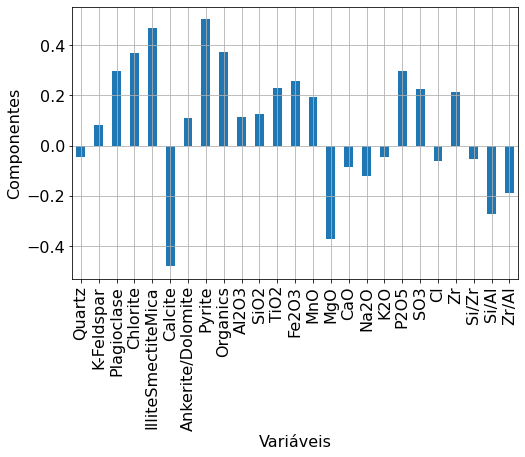

In [51]:
# Plotando o quinto fator (linha 4 da tabela acima)
# Gráfico dos autovalores
plt.figure(figsize=(8,5))   # tamanho da figura
loading_df.iloc[4].plot(kind='bar')                # resultado dos componentes para o sexto fator
plt.xlabel('Variáveis',fontsize=16,color = 'black')
plt.ylabel('Componentes',fontsize=16,color = 'black')
plt.xticks(fontsize=16,color = 'black')
plt.yticks(fontsize=16,color = 'black')
plt.grid(b='on')

Caso do quinto fator:

- Altos valores de plagioclase, illite /smectite / mica, pyrite e material orgânico

- Ausência de calcite e MgO

- Interpretação: Teor de argila rica em orgânicos

Para cada fator, pode-se fazer essa análise.

-------
## Parte 3 - Agrupamento

 - EFA reduziu uma coleção inicial de 15 XRF variáveis para um conjunto de 6 fatores representativos;

 - Próximo passo seria usar esses fatores para agrupar amostras de cascalhos por suas caraterísticas geoquímicas comuns:
   - Esses grupos podem ser representados como **FÁCIES GEOQUÍMICAS**.

**Análise de Agrupamento:**

  - Abordagem adequada para atribuir um rótulo de fácies comum a amostras semelhantes.
  - Armazenamento em cluster tenta agrupar as amostras de forma que aqueles no mesmo grupo (ou cluster) sejam mais semelhantes do que aqueles em outros clusters.
  - Algoritmo a ser utilizado:
    -  **K-means**
        - O número de clusters deve ser especificado antes de executar o algoritmo.
        - Diferentes abordagens podem ser utilizadas para encontrar o número ideal de clusters.
        - Objetivo é encontrar o número mínimo de clusters que particionam com precisão o conjunto dos dados.
        - Abordagem utilizada: Elbow method.


**Elbow method:**

  -  A soma da distância quadrada de cada ponto até o centróide do cluster mais próximo (chamada de inércia no scikit-learn) é traçada para um número crescente de clusters.
  -  À medida que o número de clusters aumenta e se ajusta melhor aos dados, o erro diminui.
  - O cotovelo da curva representa o ponto de retornos decrescentes onde o aumento do número de clusters não reduz o erro de forma considerável.
    

**Elbow method:**

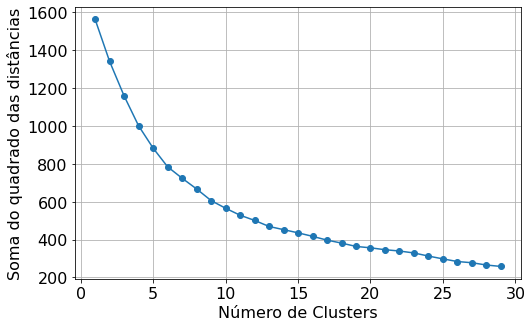

In [52]:
from sklearn.cluster import KMeans
inertias = []
means = []
maxK = 30
for k in range(1, maxK):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(factor_data)
    means.append(k)
    inertias.append(kmeans.inertia_)   # soma do quadrado das distâncias das amostras para seus respectivos centros do cluster mais próximos

plt.figure(figsize=(8,5))   # tamanho da figura
plt.plot(means, inertias, 'o-')
plt.xlabel('Número de Clusters',fontsize=16,color = 'black')
plt.ylabel('Soma do quadrado das distâncias',fontsize=16,color = 'black')
plt.xticks(fontsize=16,color = 'black')
plt.yticks(fontsize=16,color = 'black')
plt.grid(b='on')

Figure sugere que por volta de 6 clusters seria adequado para este dataset.

K-means:

Documentação:

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


Guia:

https://scikit-learn.org/stable/modules/clustering.html#k-means



In [53]:
kmeans = KMeans(n_clusters=6, random_state=0)         # K-means com 6 clusters
kmeans.fit(factor_data)
# add the cluster ids to the dataset
df2['Cluster'] = kmeans.labels_ + 1                   # cluster que cada registro se encontra

In [54]:
df2.head(4)

,Well Name,Depth,Quartz,K-Feldspar,Plagioclase,Chlorite,IlliteSmectiteMica,Calcite,Ankerite/Dolomite,Pyrite,Organics,Al2O3,SiO2,TiO2,Fe2O3,MnO,MgO,CaO,Na2O,K2O,P2O5,SO3,Cl,Zr,Si/Zr,Si/Al,Zr/Al,Cluster
0,Well 1,3173.97,27.56,0.40,8.17,5.46,20.73,26.11,9.30,1.94,0.34,7.27,42.24,0.42,3.40,0.02,0.53,19.49,0.78,1.19,0.20,1.20,0.28,201.70,0.209420,5.810179,27.744154,3
1,Well 1,3183.11,42.92,0.64,9.63,4.10,15.61,18.31,5.07,1.51,2.21,5.08,50.17,0.39,2.08,0.02,0.09,15.52,0.93,1.01,0.19,0.81,0.26,395.35,0.126900,9.875984,77.824803,4
2,Well 1,3192.26,44.55,0.56,10.07,4.33,15.17,16.78,6.14,0.80,1.60,5.05,46.91,0.38,2.14,0.02,0.15,15.52,0.87,0.98,0.18,0.76,0.23,362.70,0.129336,9.289109,71.821782,4
3,Well 1,3201.40,42.65,0.38,9.04,4.02,14.56,21.27,4.49,1.06,2.53,5.23,48.14,0.45,2.26,0.02,0.14,15.46,0.87,1.05,0.22,0.96,0.26,410.10,0.117386,9.204589,78.413002,4


- Interpretando os clusters:

  - Cada amostra foi atribuída a um dos 6 clusters
  - Cada cluster será interpretado como uma das fácies geoquímica.
  - Podemos avaliar como cada cluster se comporta de acordo com suas características geoquímicas.
  




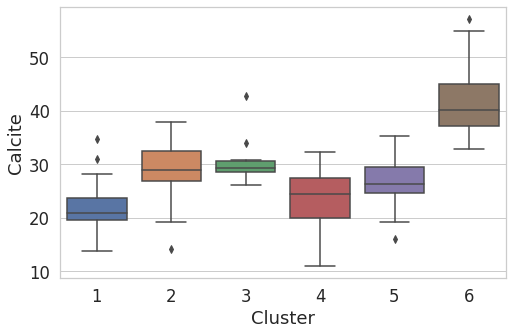

In [56]:
plt.figure(figsize=(8,5))   # tamanho da figura
sns.set(font_scale=1.5,style="whitegrid")
sns.boxplot(x='Cluster', y='Calcite', data=df2)

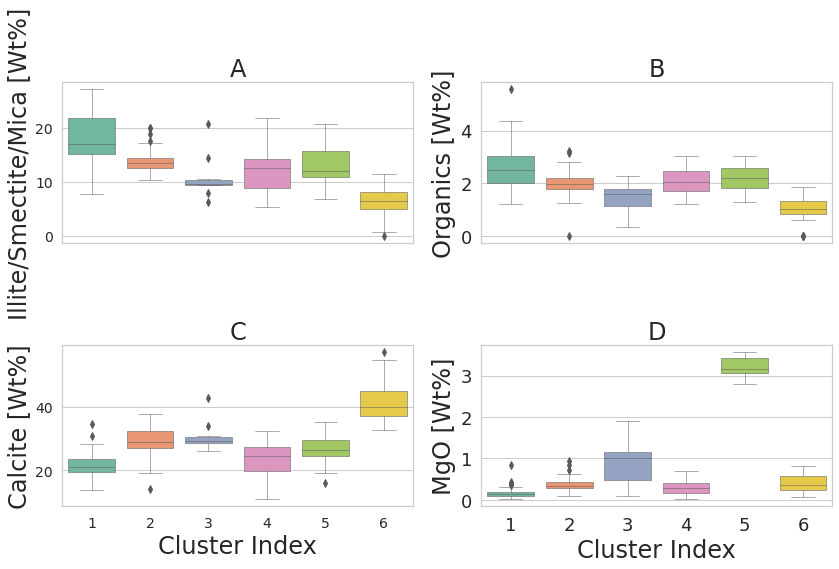

In [57]:
facies_colors = sns.color_palette("Set2", 6)  # cada cluster vai ter uma cor específica

fig, ax = plt.subplots(2,2, figsize=(12,8), sharex=True)
b= sns.boxplot(x='Cluster', y='IlliteSmectiteMica', linewidth=0.5,
            data=df2, ax=ax[0,0],
            palette=facies_colors)
b.set_title("A",fontsize=24)
b.set_xlabel("")
b.set_ylabel("Illite/Smectite/Mica [Wt%]",fontsize=24)
b.tick_params(labelsize=14)

b= sns.boxplot(x='Cluster', y='Organics', linewidth=0.5,
            data=df2, ax=ax[0,1],
            palette=facies_colors)
b.set_title("B",fontsize=24)
b.set_xlabel("")
b.set_ylabel("Organics [Wt%]",fontsize=24)
b.tick_params(labelsize=18)

b=sns.boxplot(x='Cluster', y='Calcite', linewidth=0.5,
            data=df2, ax=ax[1,0],
            palette=facies_colors)
b.set_title("C",fontsize=24)
b.set_xlabel("Cluster Index",fontsize=24)
b.set_ylabel("Calcite [Wt%]",fontsize=24)
b.tick_params(labelsize=14)

b=sns.boxplot(x='Cluster', y='MgO', linewidth=0.5,
            data=df2, ax=ax[1,1],
            palette=facies_colors)
b.set_title("D",fontsize=24)
b.set_xlabel("Cluster Index",fontsize=24)
b.set_ylabel("MgO [Wt%]",fontsize=24)
b.tick_params(labelsize=18)

plt.tight_layout()

- Cluster 1 tem alta e variável quantidade de componentes Illite/Smectite/Mica (figura A) e maior quantidade de componentes orgânicos (figura B).

- Cluster 2 tem relativamente alta quantidade de calcita (figura C)

- Cluster 5 tem alta quantidade de MgO (Figura D)

Podemos fazer isso com as demais variáveis para identificar o que cada cluster contém mais ou menos.

-------
## Parte 4 - Visualizando o resultado por profundidade

O que foi feito até agora:

- Conseguimos separar os registros por cluster. Então, cada cluster associado, será correspondente a uma composição geoquímica específica.

- Podemos verificar agora a classificação feita (ou seja, se cada registro faz parte do cluster 1, 2, 3, 4, 5, ou 6) ao longo da log do poço para identificar como essas fáceis estão ordenadadas verticalmente no poço.

In [62]:
# Função para fazer o gráfico dos logs
def make_facies_log_plot(logs, facies_colors, label):   
    # reset to original matplotlib style
    # seaborn doesn't look as good for this
    import matplotlib as mpl
    mpl.rcParams.update(mpl.rcParamsDefault)
    
    #make sure logs are sorted by depth 
    logs = logs.sort_values(by='Depth')   # ordem crescente
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()   # eixo da profundidade
    
    cluster=np.repeat(np.expand_dims(logs[label].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=5, figsize=(8, 10))
    ax[0].plot(logs['IlliteSmectiteMica'], logs.Depth, '-g')
    ax[1].plot(logs['Organics'], logs.Depth, '-')
    ax[2].plot(logs['Calcite'], logs.Depth, '-', color='0.5')
    ax[3].plot(logs['MgO'], logs.Depth, '-', color='r')
    im=ax[4].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=0,vmax=6)
    
    divider = make_axes_locatable(ax[4])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((10*' ').join(['Cluster 1', 'Cluster 2', 'Cluster 3', 
                                'Cluster 4', 'Cluster 5', 'Cluster 6']), fontsize=14)
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel('Clay Minerals', fontsize=16)
    ax[0].set_xlim(logs['IlliteSmectiteMica'].min(),logs['IlliteSmectiteMica'].max())
    ax[0].set_ylabel('MD [m]', fontsize=24)
    ax[0].tick_params(labelsize=12)
    ax[0].grid(b=False)
    ax[1].set_xlabel("Organics", fontsize=14)
    ax[1].set_xlim(logs['Organics'].min(),logs['Organics'].max())
    ax[1].grid(b=False)
    ax[1].tick_params(labelsize=12)
    ax[2].set_xlabel("Calcite", fontsize=14)
    ax[2].set_xlim(logs['Calcite'].min(),logs['Calcite'].max())
    ax[2].grid(b=False)
    ax[2].tick_params(labelsize=12)
    ax[3].set_xlabel("MgO", fontsize=14)
    ax[3].set_xlim(logs['MgO'].min(),logs['MgO'].max())
    ax[3].grid(b=False)
    ax[3].tick_params(labelsize=12)
    ax[4].set_xlabel('Facies', fontsize=14)
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]);
    ax[4].set_xticklabels([])
    
    #f.suptitle(logs.iloc[0]['Well Name'], fontsize=14,y=0.9)
    return f

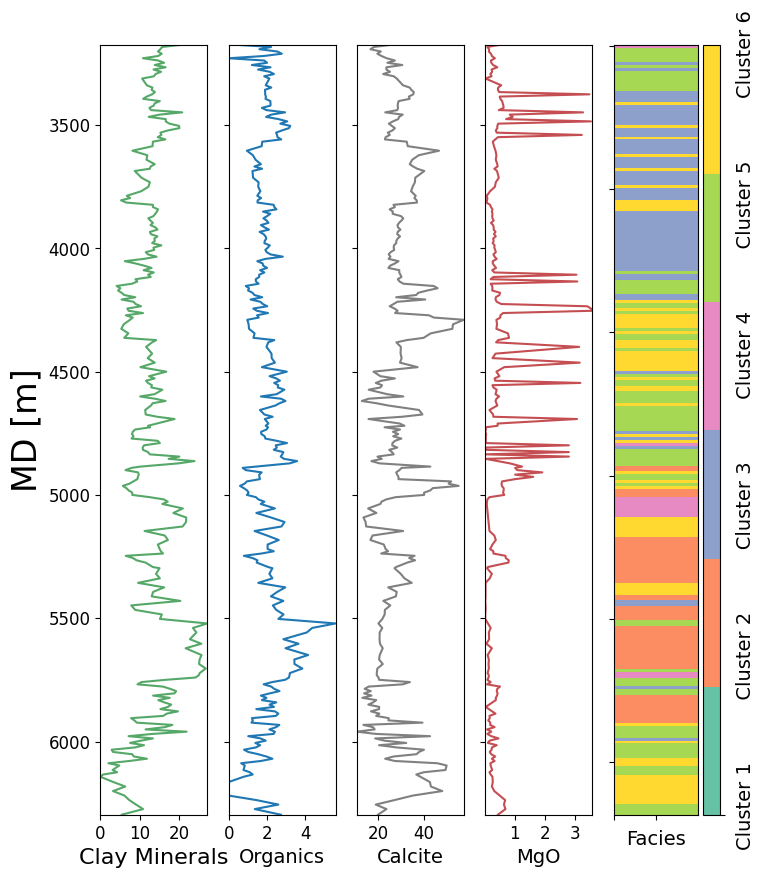

In [63]:
facies_colors = sns.color_palette("Set2", 6)
f = make_facies_log_plot(df2,
        facies_colors, 'Cluster')

Olhar

https://github.com/brendonhall/clustering_tutorial/blob/master/Geochemical%20Facies%20Analysis.ipynb

https://raw.githubusercontent.com/brendonhall/clustering_tutorial/master/well_trajectory.csv


https://csegrecorder.com/articles/view/geochemical-facies-analysis-using-unsupervised-machine-learning